<a href="https://colab.research.google.com/github/cheng3100/mygadget/blob/master/helloworld_tflite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. prepare tensorflow python env


In [2]:
# install tensorflow pip package
!pip install -q tensorflow


2. prepare the train input for this model

800 800


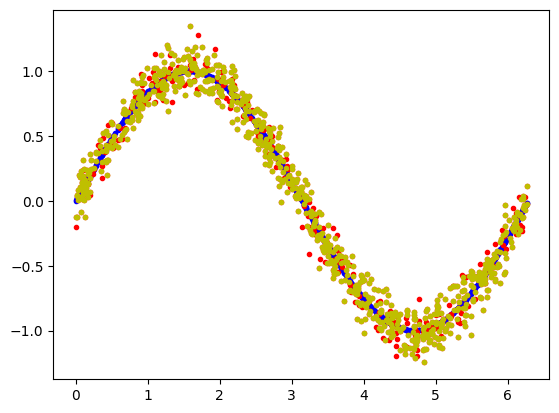

In [3]:
# 2.1 basic
import numpy as np
import math

np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

SAMPLE_SIZE=1000
x_values=np.random.uniform(low=0, high=2*math.pi, size=SAMPLE_SIZE).astype(np.float32)

# shuffle is need to guarantee they're not in order
np.random.shuffle(x_values)

y_values=np.sin(x_values).astype(np.float32)

# [plot] plot the origin input sine wave dataset
# [adjust] add some random shift/noise to sine y
import matplotlib.pyplot as plt
plt.plot(x_values, y_values, 'b.')
y_values += 0.1 * np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'r.')

# 2.2 split to train/validation/test
x_train,x_test = np.split(x_values, [int(0.8*SAMPLE_SIZE)])
y_train,y_test = np.split(y_values, [int(0.8*SAMPLE_SIZE)])
plt.plot(x_train, y_train, 'y.')
print(len(x_train), len(y_train))

3. create model

In [4]:
# `sequential` means data flow from input to output layer by layer.
# compare to other model?
model = tf.keras.Sequential()

# add a 16 tensor(neuron) `dense` layer, dense means full connection.
# Because it is a sequential model so only the input layer need to set the
# input_shape
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)))

model.add(tf.keras.layers.Dense(16, activation='relu'))

# TODO how if we still set a activation to the output tensor?
#model.add(tf.keras.layers.Dense(1, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# compile
# TODO compare with other optimizer in Keras's doc
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


# 4. train model

In [6]:
EPOCHS=500

# TODO try another validation data input
#model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(), batch_size=16,verbose=2)
ret = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.3,  batch_size=16, verbose=2)

model.save("helloworld.tf", save_format="tf")

Epoch 1/500
35/35 - 2s - loss: 0.4124 - mae: 0.5459 - val_loss: 0.3677 - val_mae: 0.5142 - 2s/epoch - 56ms/step
Epoch 2/500
35/35 - 0s - loss: 0.3445 - mae: 0.4980 - val_loss: 0.2659 - val_mae: 0.4464 - 92ms/epoch - 3ms/step
Epoch 3/500
35/35 - 0s - loss: 0.2501 - mae: 0.4274 - val_loss: 0.2101 - val_mae: 0.3956 - 139ms/epoch - 4ms/step
Epoch 4/500
35/35 - 0s - loss: 0.1982 - mae: 0.3809 - val_loss: 0.1691 - val_mae: 0.3568 - 92ms/epoch - 3ms/step
Epoch 5/500
35/35 - 0s - loss: 0.1677 - mae: 0.3508 - val_loss: 0.1487 - val_mae: 0.3307 - 93ms/epoch - 3ms/step
Epoch 6/500
35/35 - 0s - loss: 0.1506 - mae: 0.3312 - val_loss: 0.1388 - val_mae: 0.3128 - 95ms/epoch - 3ms/step
Epoch 7/500
35/35 - 0s - loss: 0.1390 - mae: 0.3117 - val_loss: 0.1371 - val_mae: 0.3025 - 93ms/epoch - 3ms/step
Epoch 8/500
35/35 - 0s - loss: 0.1317 - mae: 0.2984 - val_loss: 0.1287 - val_mae: 0.2890 - 90ms/epoch - 3ms/step
Epoch 9/500
35/35 - 0s - loss: 0.1284 - mae: 0.2872 - val_loss: 0.1244 - val_mae: 0.2804 - 135ms

# 5. show the train result

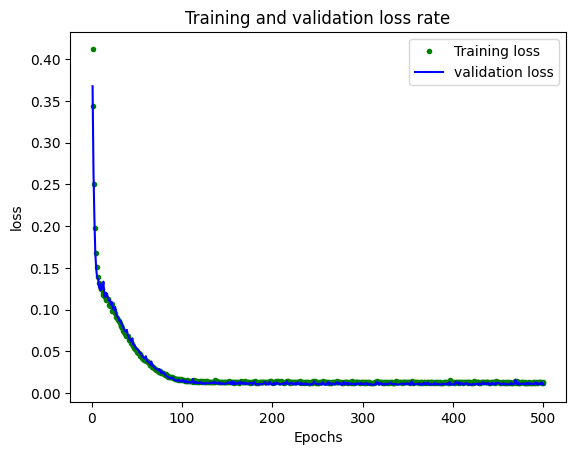

In [7]:
loss=ret.history['loss']
val_loss=ret.history['val_loss']
epochs=range(1, len(loss)+1)

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("Training and validation loss rate")
plt.plot(epochs, loss, 'g.', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="validation loss")
plt.legend()
plt.show()





# 6. Test model


7/7 [==============================] - 0s 2ms/step - loss: 0.0116 - mae: 0.0873


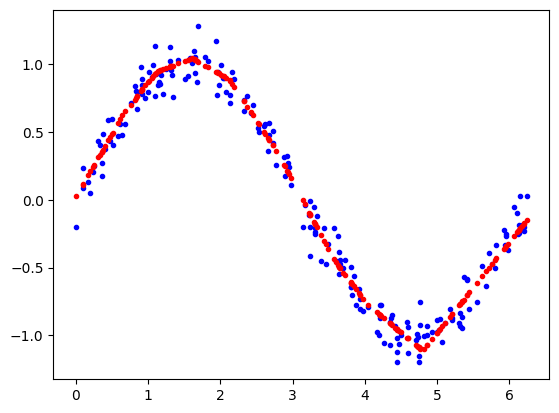

In [8]:
prediction = model.predict(x_test)

plt.clf()
plt.plot(x_test, y_test, 'b.')
plt.plot(x_test, prediction, 'r.')

loss=model.evaluate(x_test, y_test)


# convert to tflite

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

open("sine_model.tflite", "wb").write(tflite_model)

import os

tf_model_size = os.path.getsize("helloworld.tf")
tflite_model_size = os.path.getsize("sine_model.tflite")
print("tflite model size %d"%tflite_model_size)
print("tf model size %d"%tf_model_size)


tflite model size 3164
tf model size 4096
